<a href="https://colab.research.google.com/github/aureliodeboa/Restic36-Ciencia-de-Dados/blob/main/Atividade_RESTIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
import pandas as pd
import zipfile
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [ ]:
# Download latest version
path = kagglehub.dataset_download("surajjha101/top-instagram-influencers-data-cleaned")

In [ ]:
# Leitura dos dados e transformação em df

path = '/root/.cache/kagglehub/datasets/surajjha101/top-instagram-influencers-data-cleaned/versions/3'
csv_path = "/root/.cache/kagglehub/datasets/surajjha101/top-instagram-influencers-data-cleaned/versions/3/top_insta_influencers_data.csv"
df = pd.read_csv(csv_path)

In [ ]:
df.head()

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rank               200 non-null    int64 
 1   channel_info       200 non-null    object
 2   influence_score    200 non-null    int64 
 3   posts              200 non-null    object
 4   followers          200 non-null    object
 5   avg_likes          200 non-null    object
 6   60_day_eng_rate    200 non-null    object
 7   new_post_avg_like  200 non-null    object
 8   total_likes        200 non-null    object
 9   country            138 non-null    object
dtypes: int64(2), object(8)
memory usage: 15.8+ KB


In [ ]:
df.shape

(200, 10)

In [ ]:
df.describe()

,rank,influence_score
count,200.000000,200.000000
mean,100.500000,81.820000
std,57.879185,8.878159
min,1.000000,22.000000
25%,50.750000,80.000000
50%,100.500000,84.000000
75%,150.250000,86.000000
max,200.000000,93.000000


In [ ]:
#ver se tenho valores duplicados
df.duplicated().sum()

0

In [ ]:
#saber se tenho colunas com null
df.isnull().sum()

,0
rank,0
channel_info,0
influence_score,0
posts,0
followers,0
avg_likes,0
60_day_eng_rate,0
new_post_avg_like,0
total_likes,0
country,62


In [ ]:
#dropar os valores nulos da tabela, como pode ser visto existiam 62 valores nulos
df = df.dropna(subset=['country'])


❌❌**Observação, não sei se faz sentido apagar pq no caso não usamos o contry para prever nada e cabamos de perder 62 dados.** ❌❌❌

In [ ]:
#verificar se apagou
df.shape

(138, 10)

In [ ]:
country = df['country'].value_counts()

In [ ]:
country

,count
country,
United States,66
Brazil,13
India,12
Indonesia,7
France,6
Spain,5
United Kingdom,4
Colombia,3
Canada,3


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, 'Spain'),
  Text(1, 0, 'United States'),
  Text(2, 0, 'Canada'),
  Text(3, 0, 'Brazil'),
  Text(4, 0, 'Netherlands'),
  Text(5, 0, 'United Kingdom'),
  Text(6, 0, 'India'),
  Text(7, 0, 'Uruguay'),
  Text(8, 0, 'Turkey'),
  Text(9, 0, 'Indonesia'),
  Text(10, 0, 'Colombia'),
  Text(11, 0, 'France'),
  Text(12, 0, 'Australia'),
  Text(13, 0, 'Italy'),
  Text(14, 0, 'United Arab Emirates'),
  Text(15, 0, 'Puerto Rico'),
  Text(16, 0, "CÃ´te d'Ivoire"),
  Text(17, 0, 'Anguilla'),
  Text(18, 0, 'Switzerland'),
  Text(19, 0, 'Sweden'),
  Text(20, 0, 'British Virgin Islands'),
  Text(21, 0, 'Czech Republic'),
  Text(22, 0, 'Mexico'),
  Text(23, 0, 'Germany'),
  Text(24, 0, 'Russia')])

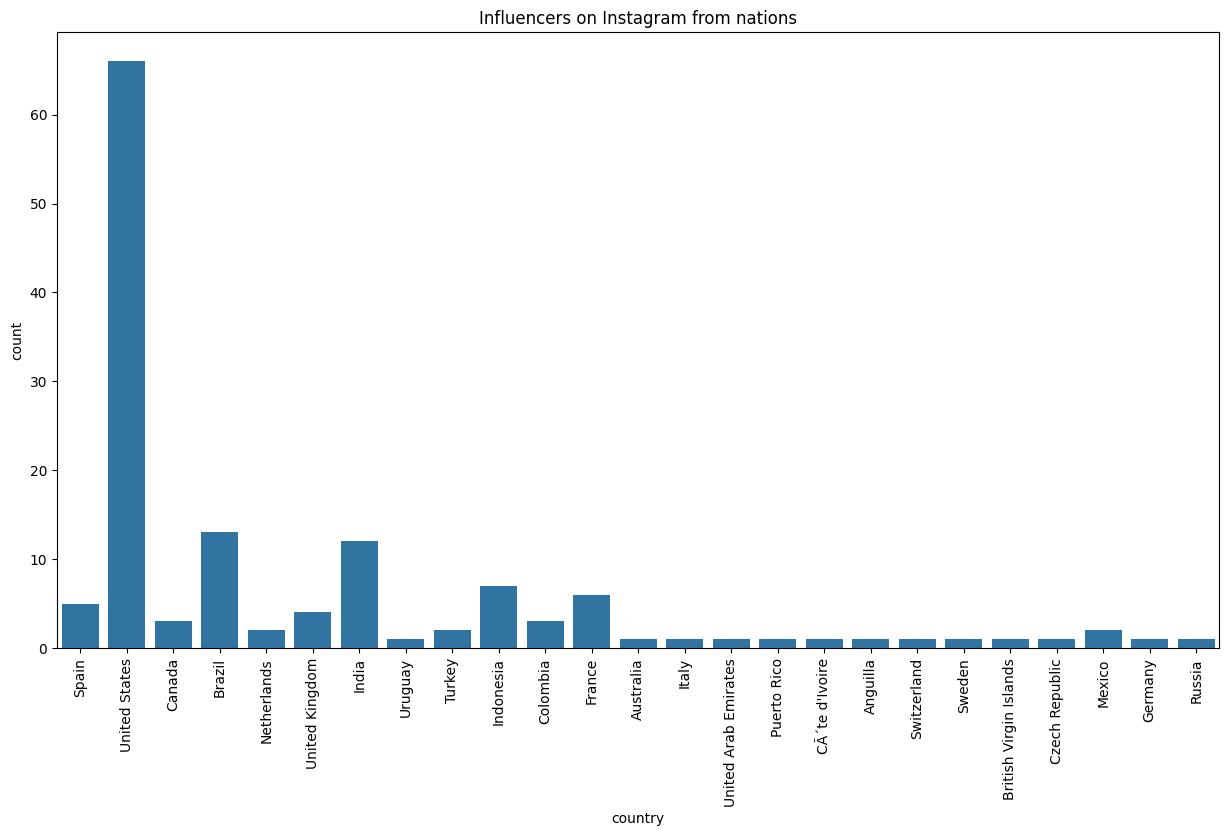

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Influencers on Instagram from nations')
sns.countplot(x=df["country"])
plt.xticks(rotation=90)

In [ ]:
df.head()

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States
5,6,kimkardashian,91,5.6k,329.2m,3.5m,0.88%,2.9m,19.9b,United States


In [ ]:
#aqui faço a troca de M de milhoes para as respctivas casas decimais e a mesma coisa para as outras letras, M, b K...

replace = {'b': 'e9', 'm': 'e6', 'k': 'e3', '%': ''}
convert_column = ['total_likes', 'posts', 'followers', 'avg_likes', '60_day_eng_rate', 'new_post_avg_like']
df[convert_column] = df[convert_column].replace(replace, regex=True).astype(float)
df[convert_column]

<ipython-input-48-f1ad5b499eae>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[convert_column] = df[convert_column].replace(replace, regex=True).astype(float)


,total_likes,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like
0,2.900000e+10,3300.0,475800000.0,8700000.0,1.39,6500000.0
1,5.740000e+10,6900.0,366200000.0,8300000.0,1.62,5900000.0
3,1.150000e+10,1800.0,342700000.0,6200000.0,0.97,3300000.0
4,1.250000e+10,6800.0,334100000.0,1900000.0,0.20,665300.0
5,1.990000e+10,5600.0,329200000.0,3500000.0,0.88,2900000.0
...,...,...,...,...,...,...
195,1.400000e+09,2300.0,33200000.0,623800.0,1.40,464700.0
196,1.500000e+09,3800.0,33200000.0,390400.0,0.64,208000.0
197,1.492000e+08,770.0,33200000.0,193300.0,0.26,82600.0
198,1.700000e+09,2300.0,33000000.0,719600.0,1.42,467700.0


In [ ]:
df.head()

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3300.0,475800000.0,8700000.0,1.39,6500000.0,2.900000e+10,Spain
1,2,kyliejenner,91,6900.0,366200000.0,8300000.0,1.62,5900000.0,5.740000e+10,United States
3,4,selenagomez,93,1800.0,342700000.0,6200000.0,0.97,3300000.0,1.150000e+10,United States
4,5,therock,91,6800.0,334100000.0,1900000.0,0.20,665300.0,1.250000e+10,United States
5,6,kimkardashian,91,5600.0,329200000.0,3500000.0,0.88,2900000.0,1.990000e+10,United States


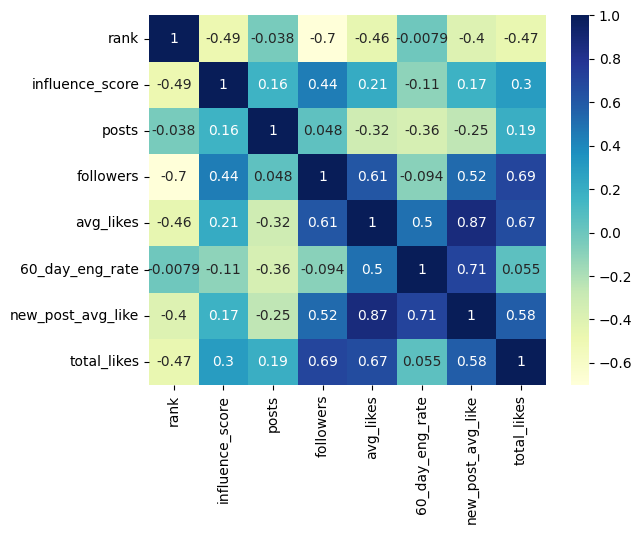

In [ ]:
# Seleciono apenas colunas numéricas
numeric_df = df.select_dtypes(include=['number'])

# Ver a matriz de correlação
sns.heatmap(numeric_df.corr(), cmap="YlGnBu", annot=True)
plt.show()

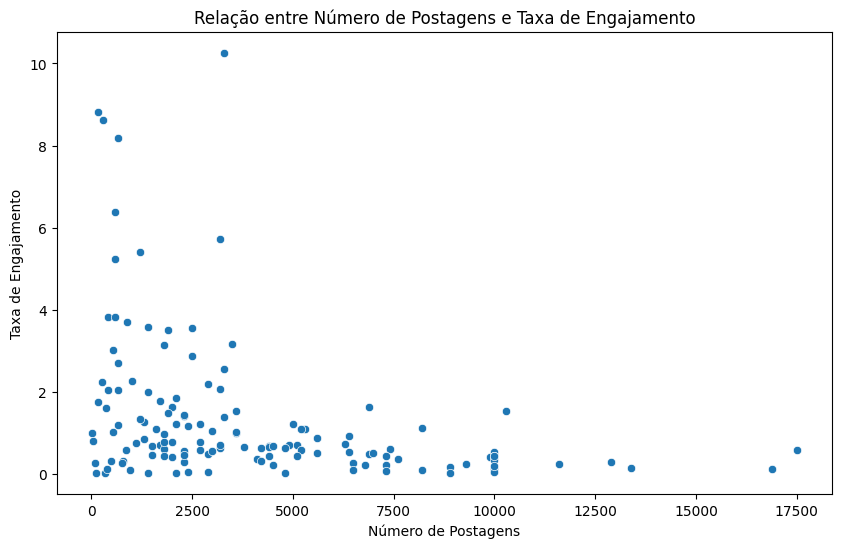

In [ ]:
# Relação entre número de postagens e taxa de engajamento
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='posts', y='60_day_eng_rate')
plt.title('Relação entre Número de Postagens e Taxa de Engajamento')
plt.xlabel('Número de Postagens')
plt.ylabel('Taxa de Engajamento')
plt.show()


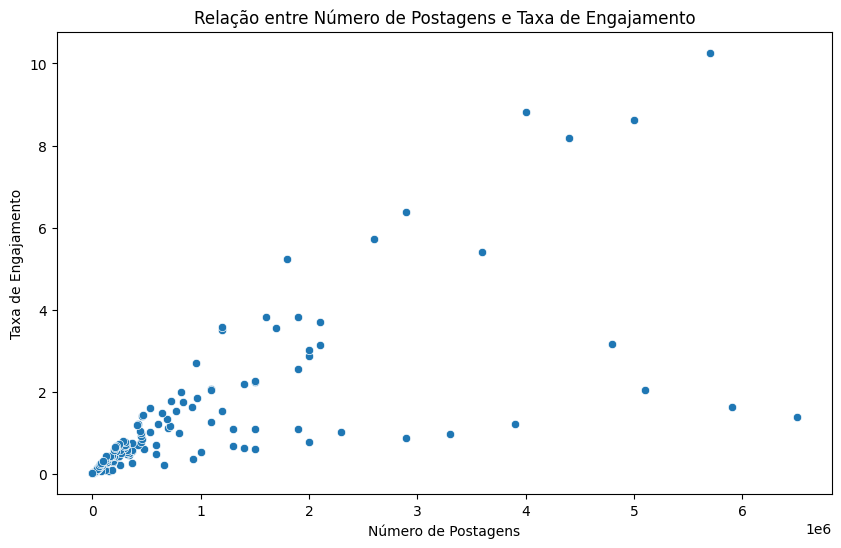

In [ ]:
# Relação entre número de likes em uma novo post e taxa de engajamento
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='new_post_avg_like', y='60_day_eng_rate')
plt.title('Relação entre Número de Postagens e Taxa de Engajamento')
plt.xlabel('Número de Postagens')
plt.ylabel('Taxa de Engajamento')
plt.show()


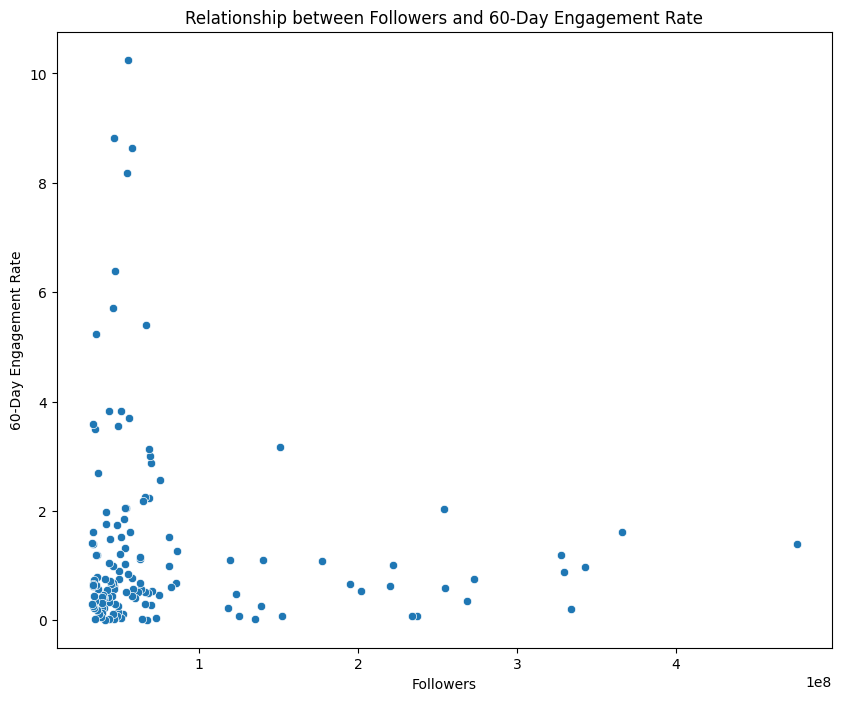

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='followers', y='60_day_eng_rate', data=df)
plt.title('Relationship between Followers and 60-Day Engagement Rate')
plt.xlabel('Followers')
plt.ylabel('60-Day Engagement Rate')
plt.show()

In [ ]:
# com esse caminho que percoremos com os dados podemos perceber as variaveis com maior correlação entre os dados


In [ ]:
df.head()

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3300.0,475800000.0,8700000.0,1.39,6500000.0,2.900000e+10,Spain
1,2,kyliejenner,91,6900.0,366200000.0,8300000.0,1.62,5900000.0,5.740000e+10,United States
3,4,selenagomez,93,1800.0,342700000.0,6200000.0,0.97,3300000.0,1.150000e+10,United States
4,5,therock,91,6800.0,334100000.0,1900000.0,0.20,665300.0,1.250000e+10,United States
5,6,kimkardashian,91,5600.0,329200000.0,3500000.0,0.88,2900000.0,1.990000e+10,United States


In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df[['posts', 'followers', 'avg_likes','new_post_avg_like','60_day_eng_rate']])
normalized_df = pd.DataFrame(x_scaled, columns=['posts', 'followers', 'avg_likes','new_post_avg_like','60_day_eng_rate'])

In [ ]:
normalized_df.head()

,posts,followers,avg_likes,new_post_avg_like,60_day_eng_rate
0,0.187643,1.000000,1.000000,1.000000,0.134766
1,0.393593,0.752596,0.953676,0.907692,0.157227
2,0.101831,0.699549,0.710477,0.507692,0.093750
3,0.387872,0.680135,0.212498,0.102354,0.018555
4,0.319222,0.669074,0.397793,0.446154,0.084961


In [ ]:
# seleção de variáveis
X = normalized_df[['posts', 'followers', 'avg_likes','new_post_avg_like']]  # Variáveis independentes
y = normalized_df['60_day_eng_rate']  # Variável dependente

# Divisão dos dados em 80% para treino e 20% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Criando o modelo de regressão linear
model = LinearRegression()

# Treinando o modelo com os dados de treinamento
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Calculando as métricas de avaliação
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimindo os resultados
print(f'MSE (Mean Squared Error): {mse}')
print(f'MAE (Mean Absolute Error): {mae}')
print(f'R² (Coeficiente de Determinação): {r2}')

#'R² Indica que 81% da variação nos dados é explicada pelo modelo
#MSE 0.005 Um erro pequeno, indicativo de boas previsões
#MAE 0.04  Diferença média pequena entre as previsões e os valores reais


MSE (Mean Squared Error): 0.005812351409789983
MAE (Mean Absolute Error): 0.04557043390513715
R² (Coeficiente de Determinação): 0.8192946915672698


In [ ]:
# Fazendo previsões com os dados de teste
y_pred = model.predict(X_test)
# Validação cruzada para calcular o erro nos dados de treinamento
train_errors = []
val_errors = []

# Treinamento e avaliação
for m in range(1, len(X_train) + 1):
    model.fit(X_train[:m], y_train[:m])
    train_error = mean_squared_error(y_train[:m], model.predict(X_train[:m]))
    val_error = mean_squared_error(y_test, model.predict(X_test))

    train_errors.append(train_error)
    val_errors.append(val_error)

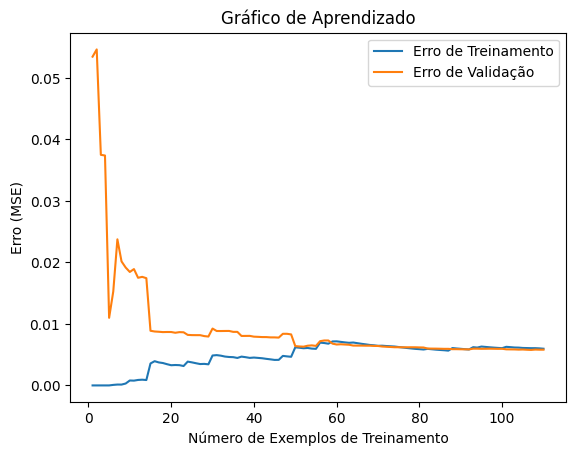

In [ ]:
# Plotando os erros de treinamento e validação
plt.plot(np.arange(1, len(X_train) + 1), train_errors, label="Erro de Treinamento")
plt.plot(np.arange(1, len(X_train) + 1), val_errors, label="Erro de Validação")
plt.xlabel("Número de Exemplos de Treinamento")
plt.ylabel("Erro (MSE)")
plt.title("Gráfico de Aprendizado")
plt.legend()
plt.show()


# Exemplo com gradiente descendente
aqui eu fiquei confuso e foi gpt works, fiz isso pq tem um item na atividade que pede pra fazer, mas eu nem sei oque pede e nem sei oque fazer. Por isso GPT cantou

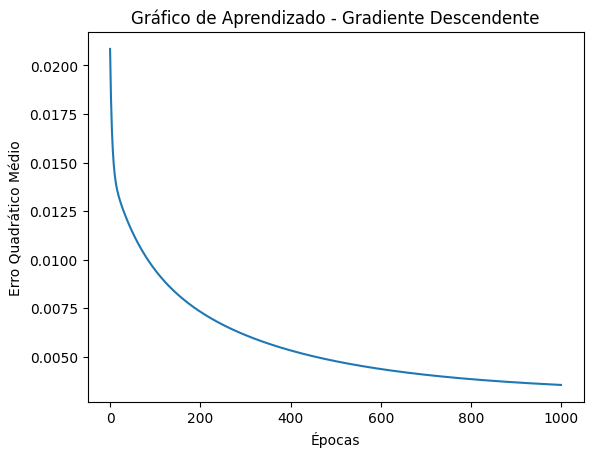

In [ ]:
import numpy as np

# Função de custo (Erro Quadrático Médio)
def mse(theta, X, y):
    m = len(y)
    return (1/(2*m)) * np.sum((X.dot(theta) - y)**2)

# Gradiente Descendente
def gradient_descent(X, y, theta, learning_rate=0.01, epochs=1000):
    m = len(y)
    cost_history = []

    for i in range(epochs):
        gradient = (1/m) * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate * gradient
        cost_history.append(mse(theta, X, y))

    return theta, cost_history

# Adicionando o termo de bias (coluna de 1's)
X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]

# Inicializando os coeficientes (theta)
theta_init = np.zeros(X_b.shape[1])

# Treinando o modelo com Gradiente Descendente
theta_optimal, cost_history = gradient_descent(X_b, y_train, theta_init, learning_rate=0.1, epochs=1000)

# Plotando a evolução do erro durante o treinamento
import matplotlib.pyplot as plt
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel('Épocas')
plt.ylabel('Erro Quadrático Médio')
plt.title('Gráfico de Aprendizado - Gradiente Descendente')
plt.show()


Com Ridge Lasso

In [ ]:
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression (L2)
ridge_model = Ridge(alpha=1.0)  # 'alpha' controla a força da regularização
ridge_model.fit(X_train, y_train)
print("Coeficientes Ridge:", ridge_model.coef_)

# Lasso Regression (L1)
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
print("Coeficientes Lasso:", lasso_model.coef_)


Coeficientes Ridge: [-0.10208426 -0.35761553  0.05536016  0.57447222]
Coeficientes Lasso: [-0. -0.  0.  0.]


In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalizando os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treinando o modelo com dados normalizados
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [ ]:
from sklearn.model_selection import cross_val_score

# Validação Cruzada para avaliar o desempenho do modelo
model = LinearRegression()
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Mostrando a média do erro
print(f"Erro Médio (MSE) de Validação Cruzada: {-cv_scores.mean()}")


Erro Médio (MSE) de Validação Cruzada: 0.007784183746376151
